# Escape velocity

If you want to leave Earth and fly away, you need to get rid of the influence of gravity. For that it happen you need a critical velocity with which you are able to overcome Earth's gravitational pull. In physics this velocity is called as escape velocity.  

One way to calculate this escape velocity is using total mechanical energy. Consideration of total mechanical energy of the isolated system dictates that $\Delta E=\Delta K + \Delta U_g=0$. This inturn implies that $E_i=E_f$, recalling that Kinetic energy is $K=\frac{1}{2}mv^2$ and gravitational energy is given by $U_g=-\frac{GMm}{r}$, it then follows that.

$\frac{1}{2}mv_i^2-\frac{GMm}{r_i}=\frac{1}{2}mv_f^2-\frac{GMm}{r_f}$

Therefore escape velocity can be calculated as
$\frac{1}{2}mv_i^2-\frac{GM_em}{R_e}=-\frac{GM_em}{r_{max}}$  
$v_i^2=2GM_e\big(\frac{1}{R_e}-\frac{1}{r_{max}}\big)$

If it escapes $r_{max}\rightarrow\infty$ leading to

$v_{esc}=\sqrt{\frac{2GM_e}{R_e}}$

You can see that the result is independent of the object's mass. Let us now import the necessary library and values for gravitational constant, mass of Earth, radius of Earth.

We can calculate the escape velocity from each of the planets in our solar system, all we need to need is plug the value of mass and radius of respective planets. Then again we can find these information from NASA's page, and as it would be fun to do so we opt to go to NASA'a page and scrap this information (and more actually). 

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
from math import *
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
G = 6.674 *10**(-11)
M_e = 5.97*10**(24)
R_e = 6.37*10**6

def escape_velocity():
    print (sqrt(2*G*M_e/R_e))

In [3]:
escape_velocity()

11184.731126006896


This is the velocity required to escape Earth's gravitional force.

# Web Scraping Data from HTML

We can scrap the information about planets from the following [planetary]("https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html"), it is provided in a table form. The table is normalized. We set the values of Earth to 1 and the other entries are expressed in comparison to Earth's values.

In [4]:
import requests #library used to download web pages.
#specify the url
URL = "https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html"

In [5]:
# The GET method indicates that you’re trying to get or retrieve data from a specified resource. 
# Connect to the website using the variable 'page'
# To make a GET request, invoke requests.get().
page = requests.get(URL)

In [6]:
# A Response is a powerful object for inspecting the results of the request.
type(page)

requests.models.Response

In [7]:
# verify successful connection to website

# To know about the all codes 
# https://www.restapitutorial.com/httpstatuscodes.html
  
#  a 200 OK status means that your request was successful,and the server responded with the data you were requesting,
# whereas a 404 NOT FOUND status means that the resource you were looking for was not found.     
page.status_code

200

In [8]:
#save string format of website HTML into a variable
HTMLstr = page.text
print(HTMLstr[:1000])

<html>
<head>
<title>Planetary Fact Sheet - Ratio to Earth</title>
</head>
<body bgcolor=FFFFFF>
<p>                                                                                                                                                                                                                        <!-- text and html formatting by drw at n.s.s.d c -->
<hr>
<H1>Planetary Fact Sheet - Ratio to Earth Values</H1>
<hr>
<p>

<table role="presentation" border="2" cellspacing="1" cellpadding="4">
<tr>
  <td align=left><b>&nbsp;</b></td>
  <td align=center bgcolor=F5F5F5><b>&nbsp;<a href="mercuryfact.html">MERCURY</a>&nbsp;</b></td>
  <td align=center><b>&nbsp;<a href="venusfact.html">VENUS</a>&nbsp;</b></td>
  <td align=center bgcolor=F5F5F5><b>&nbsp;<a href="earthfact.html">EARTH</a>&nbsp;</b></td>
  <td align=center><b>&nbsp;<a href="moonfact.html">MOON</a>&nbsp;</b></td>
  <td align=center bgcolor=F5F5F5><b>&nbsp;<a href="marsfact.html">MARS</a>&nbsp;</b></td>
  <td align=ce

In [9]:
#import the Beautiful soup functions to parse the data returned from the website

# Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML
# or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.
from bs4 import BeautifulSoup


In [10]:

# parse the html using beautiful soup and store in variable `soup`
# First argument: It is the raw HTML content.
# Second Argument:  Specifying the HTML parser we want to use.
soup = BeautifulSoup(HTMLstr, "html.parser")

Format page contents to include indentation. Then soup.prettify() is printed, it gives the visual representation of the parse tree created from the raw HTML content.
```python
print (soup.prettify())
```

In [11]:
# soup.<tag>: Return content between opening and closing tag including tag.
soup.title

<title>Planetary Fact Sheet - Ratio to Earth</title>

In [12]:
#shows the first <a> tag on the page
soup.a

<a href="mercuryfact.html">MERCURY</a>

The following code finds all `<a>` tags on the page. This code finds all the `<a>`  tags in the document (you can replace b with any tag you want to find)
```python
soup.find_all("a")
```

In [13]:
#show hyperlink reference for all <a> tags
all_links=soup.find_all("a")

#The following selects the first 20 rows
# If you want to see all, remove [0:20]
for link in all_links[0:20]:
    print (link.get("href"))

mercuryfact.html
venusfact.html
earthfact.html
moonfact.html
marsfact.html
jupiterfact.html
saturnfact.html
uranusfact.html
neptunefact.html
plutofact.html
planetfact_ratio_notes.html#mass
planetfact_ratio_notes.html#diam
planetfact_ratio_notes.html#dens
planetfact_ratio_notes.html#grav
planetfact_ratio_notes.html#escv
planetfact_ratio_notes.html#rotp
planetfact_ratio_notes.html#leng
planetfact_ratio_notes.html#dist
planetfact_ratio_notes.html#peri
planetfact_ratio_notes.html#peri


Next we find all the `<table>` tags using the following code, I won't display the output here as it is a long list
```python
all_tables=soup.find_all('table')
all_tables
```
    
Then we extract the data we are interested in and get the `<table>` tag that contains the data we want to scrape. You can simply use
```python soup.table ``` or 

```python
planet_table=soup.find('table')
planet_table
```

In [14]:
all_tables=soup.find_all('table')
planet_table=soup.find('table')

Next we set empty list to hold data for each of the columns we are reading using the following code block.

In [15]:
#set empty lists to hold data of each column
A=[]#Physical Quantities
B=[]#Mercury
C=[]#Venus
D=[]#Earth
E=[]#Moon
F=[]#Mars
G=[]#Jupiter
H=[]#Saturn
I=[]#Uranus
J=[]#Neptune
K=[]#Pluto

#find all <tr> tags in the table and go through each one (row)
# tr table row tag
for row in planet_table.findAll("tr"):
    body=row.findAll('td') #To store second column data
    #get all the <td> tags for each <tr> tag
    cells = row.findAll('td')
    
    #if there are 11 <td> tags, 11 cells in a row
    if len(cells)==11: 
        
        A.append(cells[0].find(text=True)) #gets info in first column and adds it to list A
        B.append(cells[1].find(text=True)) # gets info of Mercury column and adds it to list B
        C.append(cells[2].find(text=True)) # gets info of Venus column and add it to list C
        D.append(cells[3].find(text=True)) # gets info of Earth and adds it to list D
        E.append(cells[4].find(text=True)) # gets info of Moon column and adds it to list E
        F.append(cells[5].find(text=True)) # gets info of Mars column and adds it to list F
        G.append(cells[6].find(text=True)) # gets info of Jupiter column tand adds it to list G
        H.append(cells[7].find(text=True)) # gets info of Saturn column tand adds to list H
        I.append(cells[8].find(text=True)) # gets info of Uranus column and adds it to list I
        J.append(cells[9].find(text=True)) # gets info of Neptune column and adds it to list J
        K.append(cells[10].find(text=True)) # gets info of NePluto column and adds to list K

In [16]:
#verify data in list A
A

['\xa0',
 'Mass',
 'Diameter',
 'Density',
 'Gravity',
 'Escape Velocity',
 'Rotation Period',
 'Length of Day',
 'Distance from Sun',
 'Perihelion',
 'Aphelion',
 'Orbital Period',
 'Orbital Velocity',
 'Orbital Eccentricity',
 'Obliquity to Orbit',
 'Surface Pressure',
 'Number of Moons',
 'Ring System?',
 'Global Magnetic Field?',
 '\xa0']

Great! We successfully read the table and put it in a list [A,B,...,K], now we need to convert it into DataFrame

In [17]:
#import pandas to convert list to data frame
import pandas as pd

df=pd.DataFrame(A, columns=['Physical_Measurement']) #turn list A into dataframe first

#add other lists as new columns in my new dataframe
df['Mercury'] = B
df['Venus'] = C
df['Earth'] = D
df['Moon'] = E
df['Mars'] = F
df['Jupiter'] = G
df['Saturn'] = H
df['Uranus'] = I
df['Neptune'] = J
df['Pluto'] = K


We then proceed on replacing null values and we also see that we have 'Unknown*'. After that we display our dataframe and inspect if everything is alright.

In [18]:
df=df.fillna(0)
df=df.replace(to_replace = 'Unknown*', value =0) 
#Planetary Fact Sheet - Ratio to Earth Values

#show first 5 rows of created dataframe
df


,Physical_Measurement,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,,,,,,,,,,,
1,Mass,0.0553,0.815,1,0.0123,0.107,317.8,95.2,14.5,17.1,0.0025
2,Diameter,0.383,0.949,1,0.2724,0.532,11.21,9.45,4.01,3.88,0.186
3,Density,0.984,0.951,1,0.605,0.713,0.240,0.125,0.230,0.297,0.380
4,Gravity,0.378,0.907,1,0.166,0.377,2.36,0.916,0.889,1.12,0.071
5,Escape Velocity,0.384,0.926,1,0.213,0.450,5.32,3.17,1.90,2.10,0.116
6,Rotation Period,58.8,-244,1,27.4,1.03,0.415,0.445,-0.720,0.673,6.41
7,Length of Day,175.9,116.8,1,29.5,1.03,0.414,0.444,0.718,0.671,6.39
8,Distance from Sun,0.387,0.723,1,0.00257*,1.52,5.20,9.58,19.20,30.05,39.48
9,Perihelion,0.313,0.731,1,0.00247*,1.41,5.03,9.20,18.64,30.22,30.16


First we notice that we have an empty row on the first and last rows of the dataframe. 
Let us drop these two using the following code.

In [19]:
df=df.drop(df.index[0])
df=df.drop(df.index[-1])
df

,Physical_Measurement,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
1,Mass,0.0553,0.815,1,0.0123,0.107,317.8,95.2,14.5,17.1,0.0025
2,Diameter,0.383,0.949,1,0.2724,0.532,11.21,9.45,4.01,3.88,0.186
3,Density,0.984,0.951,1,0.605,0.713,0.240,0.125,0.230,0.297,0.380
4,Gravity,0.378,0.907,1,0.166,0.377,2.36,0.916,0.889,1.12,0.071
5,Escape Velocity,0.384,0.926,1,0.213,0.450,5.32,3.17,1.90,2.10,0.116
6,Rotation Period,58.8,-244,1,27.4,1.03,0.415,0.445,-0.720,0.673,6.41
7,Length of Day,175.9,116.8,1,29.5,1.03,0.414,0.444,0.718,0.671,6.39
8,Distance from Sun,0.387,0.723,1,0.00257*,1.52,5.20,9.58,19.20,30.05,39.48
9,Perihelion,0.313,0.731,1,0.00247*,1.41,5.03,9.20,18.64,30.22,30.16
10,Aphelion,0.459,0.716,1,0.00267*,1.64,5.37,9.96,19.75,29.89,48.49


It is always good habit to check data types, and that can be achieved via .dtypes()

In [20]:
df.dtypes

Physical_Measurement    object
Mercury                 object
Venus                   object
Earth                   object
Moon                    object
Mars                    object
Jupiter                 object
Saturn                  object
Uranus                  object
Neptune                 object
Pluto                   object
dtype: object

Although we see numbers, all the data types are object type, and this is because some of the entries have ("*") at the end, let us take care of these then

In [21]:
#getting rid of *
df= df.applymap(lambda x: x.strip('*') if isinstance(x, str) else x)
df
#display the table if everything is OK

,Physical_Measurement,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
1,Mass,0.0553,0.815,1,0.0123,0.107,317.8,95.2,14.5,17.1,0.0025
2,Diameter,0.383,0.949,1,0.2724,0.532,11.21,9.45,4.01,3.88,0.186
3,Density,0.984,0.951,1,0.605,0.713,0.240,0.125,0.230,0.297,0.380
4,Gravity,0.378,0.907,1,0.166,0.377,2.36,0.916,0.889,1.12,0.071
5,Escape Velocity,0.384,0.926,1,0.213,0.450,5.32,3.17,1.90,2.10,0.116
6,Rotation Period,58.8,-244,1,27.4,1.03,0.415,0.445,-0.720,0.673,6.41
7,Length of Day,175.9,116.8,1,29.5,1.03,0.414,0.444,0.718,0.671,6.39
8,Distance from Sun,0.387,0.723,1,0.00257,1.52,5.20,9.58,19.20,30.05,39.48
9,Perihelion,0.313,0.731,1,0.00247,1.41,5.03,9.20,18.64,30.22,30.16
10,Aphelion,0.459,0.716,1,0.00267,1.64,5.37,9.96,19.75,29.89,48.49


Although we are not going to use it in this analysis we notice that the last two rows needs further cleaning, for example we can it from category into numeric. If you want you can also strip the question mark at the end using the strip method.

In [22]:

df = df.replace(to_replace=['No', 'Yes','Unknown'], value=[0, 1, 2])
df

,Physical_Measurement,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
1,Mass,0.0553,0.815,1,0.0123,0.107,317.8,95.2,14.5,17.1,0.0025
2,Diameter,0.383,0.949,1,0.2724,0.532,11.21,9.45,4.01,3.88,0.186
3,Density,0.984,0.951,1,0.605,0.713,0.240,0.125,0.230,0.297,0.380
4,Gravity,0.378,0.907,1,0.166,0.377,2.36,0.916,0.889,1.12,0.071
5,Escape Velocity,0.384,0.926,1,0.213,0.450,5.32,3.17,1.90,2.10,0.116
6,Rotation Period,58.8,-244,1,27.4,1.03,0.415,0.445,-0.720,0.673,6.41
7,Length of Day,175.9,116.8,1,29.5,1.03,0.414,0.444,0.718,0.671,6.39
8,Distance from Sun,0.387,0.723,1,0.00257,1.52,5.20,9.58,19.20,30.05,39.48
9,Perihelion,0.313,0.731,1,0.00247,1.41,5.03,9.20,18.64,30.22,30.16
10,Aphelion,0.459,0.716,1,0.00267,1.64,5.37,9.96,19.75,29.89,48.49


I find it this type of data hard to visualize, so let me change the index to be the column 'Physical_Measurement'. 

In [23]:
#change index
df = df.set_index('Physical_Measurement')
df

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
Physical_Measurement,,,,,,,,,,
Mass,0.0553,0.815,1,0.0123,0.107,317.8,95.2,14.5,17.1,0.0025
Diameter,0.383,0.949,1,0.2724,0.532,11.21,9.45,4.01,3.88,0.186
Density,0.984,0.951,1,0.605,0.713,0.240,0.125,0.230,0.297,0.380
Gravity,0.378,0.907,1,0.166,0.377,2.36,0.916,0.889,1.12,0.071
Escape Velocity,0.384,0.926,1,0.213,0.450,5.32,3.17,1.90,2.10,0.116
Rotation Period,58.8,-244,1,27.4,1.03,0.415,0.445,-0.720,0.673,6.41
Length of Day,175.9,116.8,1,29.5,1.03,0.414,0.444,0.718,0.671,6.39
Distance from Sun,0.387,0.723,1,0.00257,1.52,5.20,9.58,19.20,30.05,39.48
Perihelion,0.313,0.731,1,0.00247,1.41,5.03,9.20,18.64,30.22,30.16


Let us check now if everything is inorder when it comes to data types

In [24]:
df.dtypes

Mercury    object
Venus      object
Earth      object
Moon       object
Mars       object
Jupiter    object
Saturn     object
Uranus     object
Neptune    object
Pluto      object
dtype: object

To make sure everything is numeric we can use pandas *to_numeric* method and apply it to our dataFrame

In [25]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dtypes

Mercury    float64
Venus      float64
Earth        int64
Moon       float64
Mars       float64
Jupiter    float64
Saturn     float64
Uranus     float64
Neptune    float64
Pluto      float64
dtype: object

In [26]:
df

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
Physical_Measurement,,,,,,,,,,
Mass,0.0553,0.815,1,0.01230,0.107,317.800,95.200,14.500,17.100,0.00250
Diameter,0.3830,0.949,1,0.27240,0.532,11.210,9.450,4.010,3.880,0.18600
Density,0.9840,0.951,1,0.60500,0.713,0.240,0.125,0.230,0.297,0.38000
Gravity,0.3780,0.907,1,0.16600,0.377,2.360,0.916,0.889,1.120,0.07100
Escape Velocity,0.3840,0.926,1,0.21300,0.450,5.320,3.170,1.900,2.100,0.11600
Rotation Period,58.8000,-244.000,1,27.40000,1.030,0.415,0.445,-0.720,0.673,6.41000
Length of Day,175.9000,116.800,1,29.50000,1.030,0.414,0.444,0.718,0.671,6.39000
Distance from Sun,0.3870,0.723,1,0.00257,1.520,5.200,9.580,19.200,30.050,39.48000
Perihelion,0.3130,0.731,1,0.00247,1.410,5.030,9.200,18.640,30.220,30.16000


But for purpose of analysis, it will better if the indices are planets, we can achieve this by taking the transpose of the table, where we interchange row and columns

In [27]:
#Transpose index and columns.
#Reflect the DataFrame over its main diagonal by 
#writing rows as columns and vice-versa. 
#The property T is an accessor to the method transpose().
dfT = df.T


In [28]:
#check if columns are changed
dfT.columns


Index(['Mass', 'Diameter', 'Density', 'Gravity', 'Escape Velocity',
       'Rotation Period', 'Length of Day', 'Distance from Sun', 'Perihelion',
       'Aphelion', 'Orbital Period', 'Orbital Velocity',
       'Orbital Eccentricity', 'Obliquity to Orbit', 'Surface Pressure',
       'Number of Moons', 'Ring System?', 'Global Magnetic Field?'],
      dtype='object', name='Physical_Measurement')

Extract relevant columns for our analysis and then form a data frame, you can do so as follows

In [29]:
#Extract relevant columns 
dfT = dfT[['Mass', 'Diameter', 'Density', 'Gravity', 'Escape Velocity',
       'Rotation Period', 'Length of Day', 'Distance from Sun', 'Perihelion',
       'Aphelion', 'Orbital Period', 'Orbital Velocity']]
dfT

Physical_Measurement,Mass,Diameter,Density,Gravity,Escape Velocity,Rotation Period,Length of Day,Distance from Sun,Perihelion,Aphelion,Orbital Period,Orbital Velocity
Mercury,0.0553,0.3830,0.984,0.378,0.384,58.800,175.900,0.38700,0.31300,0.45900,0.2410,1.5900
Venus,0.8150,0.9490,0.951,0.907,0.926,-244.000,116.800,0.72300,0.73100,0.71600,0.6150,1.1800
Earth,1.0000,1.0000,1.000,1.000,1.000,1.000,1.000,1.00000,1.00000,1.00000,1.0000,1.0000
Moon,0.0123,0.2724,0.605,0.166,0.213,27.400,29.500,0.00257,0.00247,0.00267,0.0748,0.0343
Mars,0.1070,0.5320,0.713,0.377,0.450,1.030,1.030,1.52000,1.41000,1.64000,1.8800,0.8080
Jupiter,317.8000,11.2100,0.240,2.360,5.320,0.415,0.414,5.20000,5.03000,5.37000,11.9000,0.4390
Saturn,95.2000,9.4500,0.125,0.916,3.170,0.445,0.444,9.58000,9.20000,9.96000,29.4000,0.3250
Uranus,14.5000,4.0100,0.230,0.889,1.900,-0.720,0.718,19.20000,18.64000,19.75000,83.7000,0.2280
Neptune,17.1000,3.8800,0.297,1.120,2.100,0.673,0.671,30.05000,30.22000,29.89000,163.7000,0.1820
Pluto,0.0025,0.1860,0.380,0.071,0.116,6.410,6.390,39.48000,30.16000,48.49000,247.9000,0.1570


# Visualizations

Now everything is inorder and as we want it to be, it will be good idea to plot and visualize the parameters. Recall this is. Below we present plots of each columns versus planets, group of parameters versus planets, and stack all the columns in one plot.   

The eight (spoiler alert!) planets of our Solar System vary widely, not only in terms of size, but also in terms of other parameters. 

## Plots of individual column 

### Mass

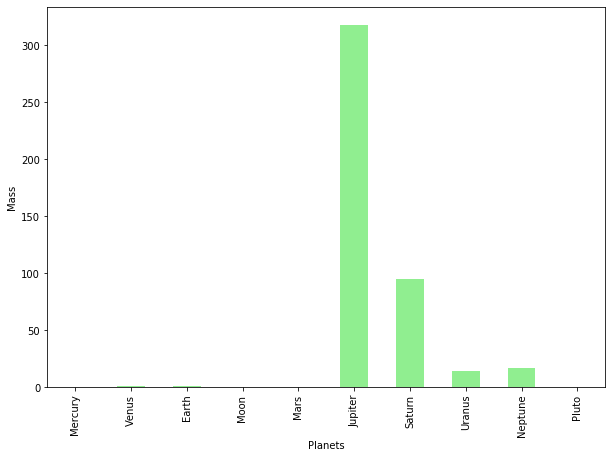

In [30]:
ax=dfT['Mass'].plot(kind='bar',x=dfT.index, figsize=(10,7),color='lightgreen')
ax.set_xlabel("Planets")
ax.set_ylabel("Mass");

We can see, as expected, Jupiter and Staurn are big. Because of a wide range of max and min values, values of 1 or below seems to be zero. Hard to see in this plpot, you can use ylim to need to see the results as follows 

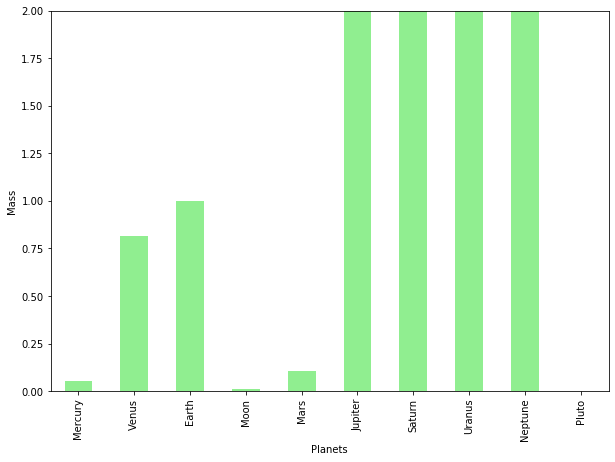

In [31]:
ax=dfT['Mass'].plot(kind='bar',x=dfT.index, figsize=(10,7),color='lightgreen')
ax.set_xlabel("Planets")
#ax1.set_xlim([begin, end])
ax.set_ylim([0, 2])
ax.set_ylabel("Mass");

### Escape Velocity

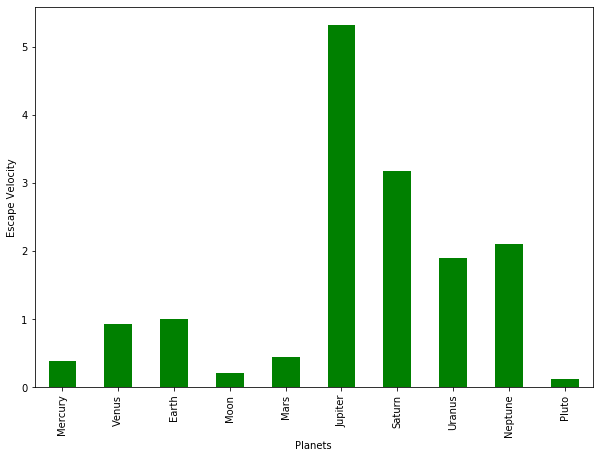

In [32]:
ax=dfT['Escape Velocity'].plot(kind='bar',x=dfT.index, figsize=(10,7),color='g')
ax.set_xlabel("Planets")
ax.set_ylabel("Escape Velocity");

### Length of Day

**How old will you be on the other planets?**

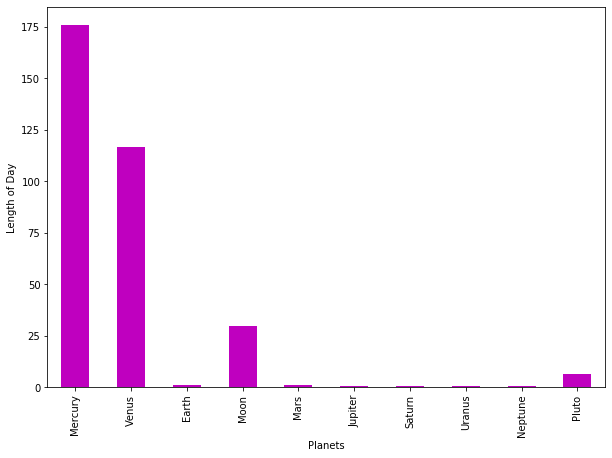

In [33]:
ax=dfT['Length of Day'].plot(kind='bar',x=dfT.index, figsize=(10,7),color='m')
ax.set_xlabel("Planets")
ax.set_ylabel("Length of Day");

You can find in [How Long Is One Day on other Planets](https://spaceplace.nasa.gov/days/en/) how long each is one day in each planet. The answer is
> **On Mercury a day lasts 1,408 hours, and on Venus it lasts 5,832 hours. On Earth and Mars it’s very similar. Earth takes 24 hours to complete one spin, and Mars takes 25 hours. The gas giants rotate really fast. Jupiter takes just 10 hours to complete one rotation. Saturn takes 11 hours, Uranus takes 17 hours, and Neptune takes 16 hours.**

You may notice that Mercury and Venus have a very long day. To make sense of it recall that a day is the amount of time it takes for a planet to completely spin around, its axis, and make one full rotation.

### Gravity

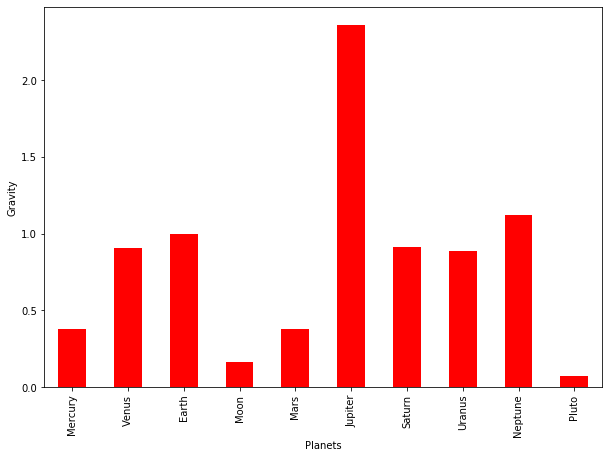

In [34]:
ax=dfT['Gravity'].plot(kind='bar',x=dfT.index, figsize=(10,7),color='r')
ax.set_xlabel("Planets")
ax.set_ylabel("Gravity");

Gravity varies depending on the size, mass and density of the planet. In our solar system we can see that gravity varies, ranging from 0.38 g on Mercury and Mars to a powerful 2.528 g Jupiter's. And on the Moon, which is our natural satellite, it is a very small 0.1654 g.

### Density

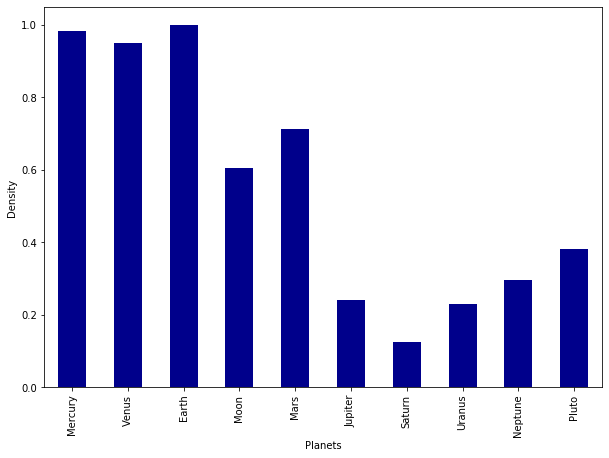

In [35]:
ax=dfT['Density'].plot(kind='bar',x=dfT.index, figsize=(10,7),color='darkblue')
ax.set_xlabel("Planets")
ax.set_ylabel("Density");


Density is defined as mass per unit of volume. We can see that the four inner planets – those that are closest to the Sun – are denser. This is because they are composed primarily of silicate rocks or metals and have a solid surface. 

The four outer planets are designated as gas giants this is so because they are composed primarily of of hydrogen, helium, and water existing in various physical states. Although size wise these planets are greater and heavier, their overall density is much lower. 

### Distance from the sun

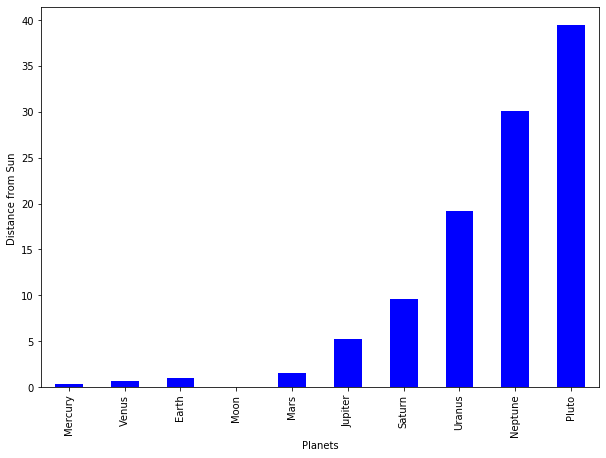

In [36]:
ax=dfT['Distance from Sun'].plot(kind='bar',x=dfT.index, figsize=(10,7),color='b')
ax.set_xlabel("Planets")
ax.set_ylabel("Distance from Sun ");

## Plot of two or more columns

### Gravity, Density, Escape Velocity

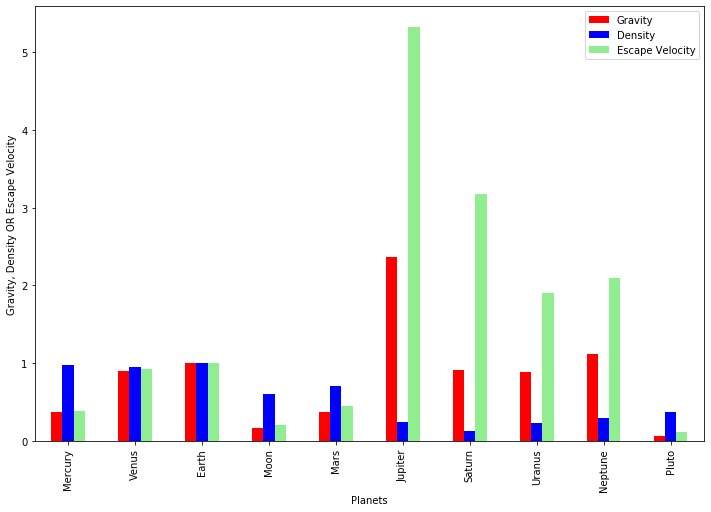

In [42]:
dfT1 = pd.DataFrame(dfT, columns=['Gravity', 'Density', 'Escape Velocity'])
colors=['red','blue','lightgreen']
ax=dfT1.plot.bar( figsize=(12,8), color=colors)
ax.set_xlabel("Planets")
ax.set_ylabel("Gravity, Density OR Escape Velocity");

### Distance from the sun, Length of Day

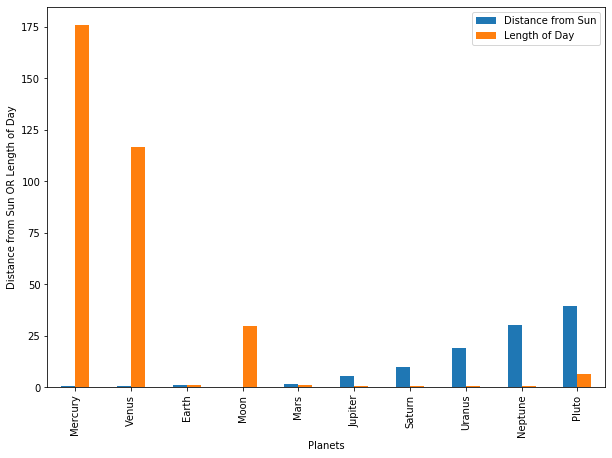

In [38]:
dfT2 = pd.DataFrame(dfT, columns=['Distance from Sun', 'Length of Day'])
ax=dfT2.plot.bar(figsize=(10,7))
ax.set_xlabel("Planets")
ax.set_ylabel("Distance from Sun OR Length of Day");

## Stacked columns

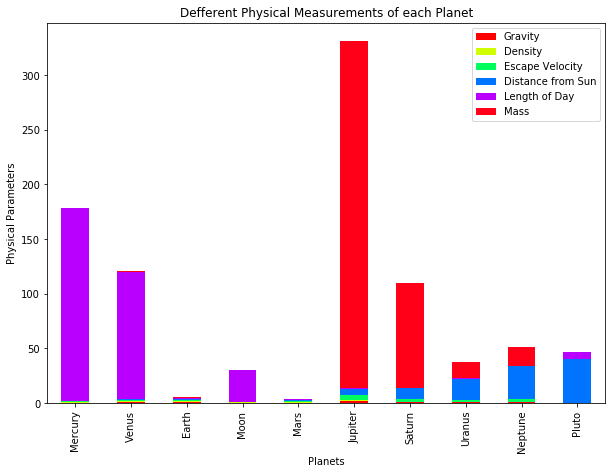

In [39]:
dfT3 = pd.DataFrame(dfT, columns=['Gravity', 'Density', 'Escape Velocity','Distance from Sun', 'Length of Day','Mass'])
ax=dfT3.plot.bar(stacked=True, figsize=(10,7),colormap='hsv',title='Defferent Physical Measurements of each Planet')
ax.set_xlabel("Planets")
ax.set_ylabel("Physical Parameters");

## Scaled Stacked Columns

In [40]:

scaler = MinMaxScaler()
dfT4 = pd.DataFrame(scaler.fit_transform(dfT3), columns=dfT3.columns)

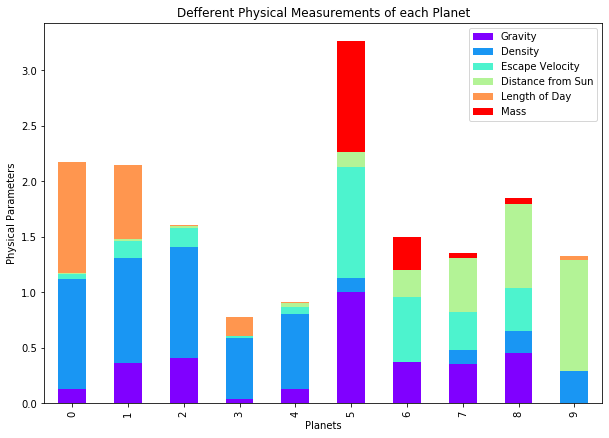

In [41]:
ax=dfT4.plot.bar(stacked=True, figsize=(10,7),colormap='rainbow',title='Defferent Physical Measurements of each Planet')
ax.set_xlabel("Planets")
ax.set_ylabel("Physical Parameters");